In [34]:
# Do pobrania danych
#pip install ucimlrepo    

In [7]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


chess_king_rook_vs_king = fetch_ucirepo(id=23) 

X = chess_king_rook_vs_king.data.features 
y = chess_king_rook_vs_king.data.targets 


df = pd.concat([X, y], axis=1)

df


,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw
...,...,...,...,...,...,...,...
28051,b,1,g,7,e,5,sixteen
28052,b,1,g,7,e,6,sixteen
28053,b,1,g,7,e,7,sixteen
28054,b,1,g,7,f,5,sixteen


In [8]:
# Zamiana oznaczeń kolumn na wartości liczbowe
file_mapping = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8}
for col in ['white-king-file', 'white-rook-file', 'black-king-file']:
    df[col] = df[col].map(file_mapping)

# Zamiana wyników (depth-of-win) na wartości liczbowe
depth_mapping = {'draw': -1, 'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 
                 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10,
                 'eleven': 11, 'twelve': 12, 'thirteen': 13, 'fourteen': 14, 
                 'fifteen': 15, 'sixteen': 16}
df['white-depth-of-win'] = df['white-depth-of-win'].map(depth_mapping)

# Obliczanie dystansów między królami 
dx = np.abs(df['white-king-file'] - df['black-king-file'])
dy = np.abs(df['white-king-rank'] - df['black-king-rank'])

# Metryka Euklidesowa
df['dist_euclidean'] = np.sqrt(dx**2 + dy**2)

# Metryka Manhattan
df['dist_manhattan'] = dx + dy

# Metryka Czebyszewa
df['dist_chebyshev'] = np.maximum(dx, dy)

# Odleglosc czarnego krola od krawedzi
df['bk_dist_edge'] = np.minimum.reduce([
    df['black-king-file'] - 1,
    8 - df['black-king-file'],
    df['black-king-rank'] - 1,
    8 - df['black-king-rank']
])

# Zbiór bez remisow
df_no_draws = df[df['white-depth-of-win'] >= 0]

df.head()

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win,dist_euclidean,dist_manhattan,dist_chebyshev,bk_dist_edge
0,1,1,2,3,3,2,-1,2.236068,3,2,1
1,1,1,3,1,3,2,-1,2.236068,3,2,1
2,1,1,3,1,4,1,-1,3.000000,3,3,0
3,1,1,3,1,4,2,-1,3.162278,4,3,1
4,1,1,3,2,3,1,-1,2.000000,2,2,0


## Pytanie 1


**Gdzie zwykle znajduje się na planszy czarny król, kiedy jest matowany (white-depth-of-win=0)? Gdzie znajduje się, kiedy gra kończy się remisem (white-depth-of-win=-1)?**

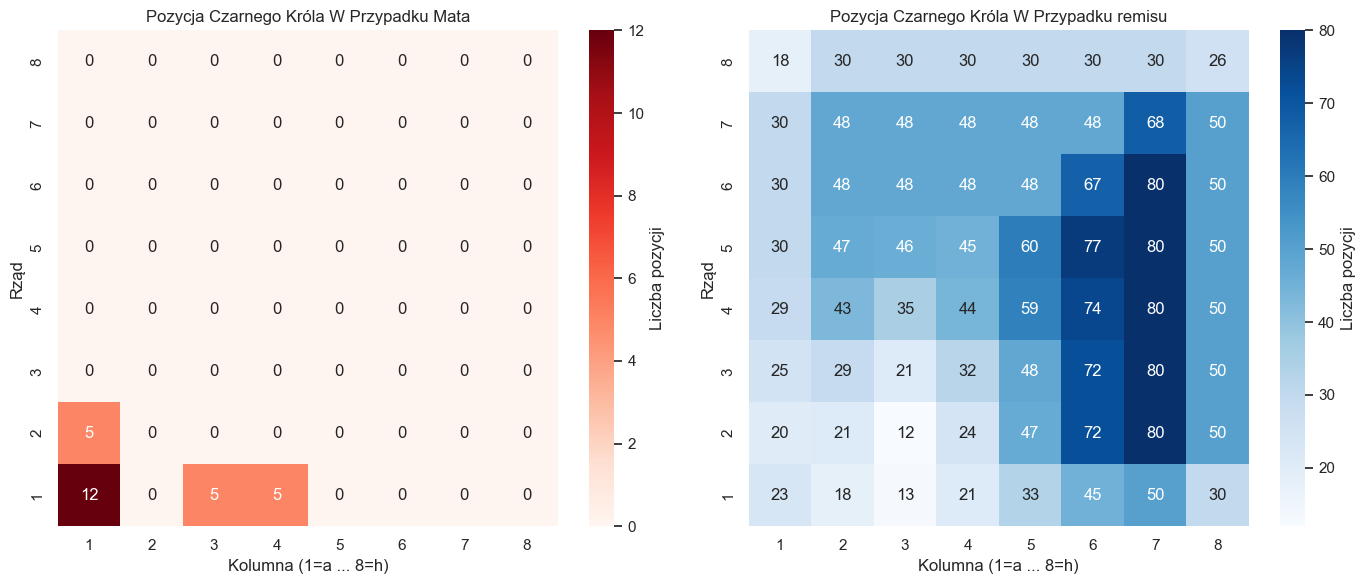

In [ ]:
# Pytanie 1
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


bk_mate = df[df['white-depth-of-win'] == 0]
bk_draw = df[df['white-depth-of-win'] == -1]


mate_pivot = pd.crosstab(bk_mate['black-king-rank'], bk_mate['black-king-file'])
mate_pivot = mate_pivot.reindex(index=range(1, 9), columns=range(1, 9), fill_value=0)
sns.heatmap(mate_pivot, ax=axes[0], cmap='Reds', annot=True, fmt='d', cbar_kws={'label': 'Liczba pozycji'})
axes[0].invert_yaxis() 
axes[0].set_title('Pozycja Czarnego Króla W Przypadku Mata')
axes[0].set_xlabel('Kolumna (1=a ... 8=h)')
axes[0].set_ylabel('Rząd')


draw_pivot = pd.crosstab(bk_draw['black-king-rank'], bk_draw['black-king-file'])
draw_pivot = draw_pivot.reindex(index=range(1, 9), columns=range(1, 9), fill_value=0)
sns.heatmap(draw_pivot, ax=axes[1], cmap='Blues', annot=True, fmt='d', cbar_kws={'label': 'Liczba pozycji'})
axes[1].invert_yaxis()
axes[1].set_title('Pozycja Czarnego Króla W Przypadku remisu')
axes[1].set_xlabel('Kolumna (1=a ... 8=h)')
axes[1].set_ylabel('Rząd')

plt.tight_layout()
plt.show()

### Odpowiedź do Pytania 1:



1. **W przypadku mata (wykres pierwszy):**
Czarny król znajduje się wyłącznie na dwóch skrajnych krawędziach szachownicy (rzędy 1 i 2, kolumny 1, 3, 4), ze szczególnym natężeniem w rogu a1. 
Wynika to z faktu, że na środku planszy samotny król ma aż 8 pól ucieczki. Aby dać mata, białe muszą "zepchnąć" czarnego króla na krawędź (5 pól ucieczki) lub do rogu (tylko 3 pola ucieczki), gdzie wieża i biały król mogą skutecznie odciąć mu wszystkie drogi i wygrać partię.

2. **W przypadku remisu (wykres drugi):**
Czarny król jest rozproszony po niemal całej planszy, choć najczęściej znajduje się w okolicach środka. W takim ułożeniu biały król ma więcej możliwości ruchu oraz szanse na wymuszenie remisu. Położenie czarnego króla bliżej środka sprzyja remisowi. 


## Pytanie 2

**Jednym z istotnych czynników tego, w ilu ruchach gra się zakończy jest dystans pomiędzy białym królem a czarnym królem. Jaka metryka dystansu (Euklidesowa, Manhattan, lub Czebyszewa) pomiędzy nimi pozwoli najlepiej oszacować liczbę ruchów do zakończenia gry? Do tej analizy zignoruj sytuacje remisowe (white-depth-of-win = -1).**

Korelacja - Euklidesowa: 0.291
Korelacja - Manhattan: 0.297
Korelacja - Czebyszewa: 0.266


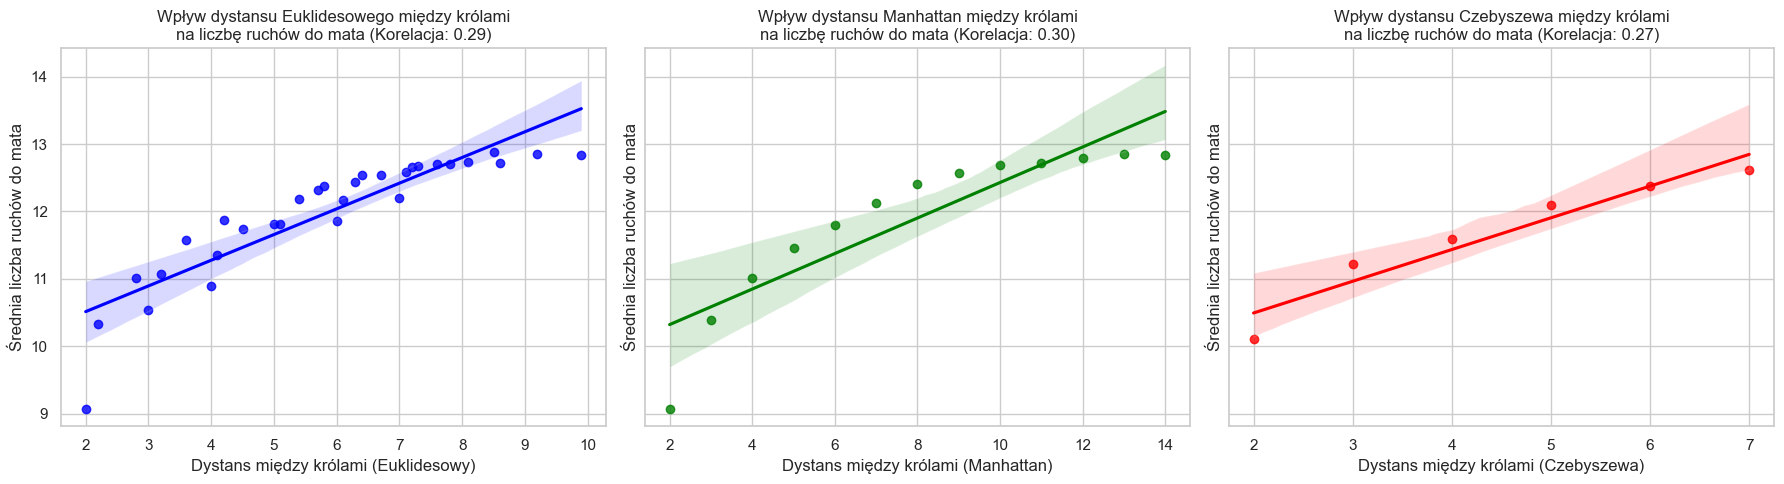

In [10]:
# Pytanie 2

# Obliczenie korelacji Pearsona pomiędzy dystansem a liczbą ruchów do wygranej
corr_euclidean = df_no_draws['dist_euclidean'].corr(df_no_draws['white-depth-of-win'])
corr_manhattan = df_no_draws['dist_manhattan'].corr(df_no_draws['white-depth-of-win'])
corr_chebyshev = df_no_draws['dist_chebyshev'].corr(df_no_draws['white-depth-of-win'])

print(f"Korelacja - Euklidesowa: {corr_euclidean:.3f}")
print(f"Korelacja - Manhattan: {corr_manhattan:.3f}")
print(f"Korelacja - Czebyszewa: {corr_chebyshev:.3f}")


fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)


euc_grouped = df_no_draws.groupby(np.round(df_no_draws['dist_euclidean'], 1))['white-depth-of-win'].mean().reset_index()
man_grouped = df_no_draws.groupby('dist_manhattan')['white-depth-of-win'].mean().reset_index()
che_grouped = df_no_draws.groupby('dist_chebyshev')['white-depth-of-win'].mean().reset_index()

# Wykresy regresji
sns.regplot(data=euc_grouped, x='dist_euclidean', y='white-depth-of-win', ax=axes[0], color='blue')
axes[0].set_title(f'Wpływ dystansu Euklidesowego między królami\nna liczbę ruchów do mata (Korelacja: {corr_euclidean:.2f})')
axes[0].set_xlabel('Dystans między królami (Euklidesowy)')
axes[0].set_ylabel('Średnia liczba ruchów do mata')

sns.regplot(data=man_grouped, x='dist_manhattan', y='white-depth-of-win', ax=axes[1], color='green')
axes[1].set_title(f'Wpływ dystansu Manhattan między królami\nna liczbę ruchów do mata (Korelacja: {corr_manhattan:.2f})')
axes[1].set_xlabel('Dystans między królami (Manhattan)')
axes[1].set_ylabel('Średnia liczba ruchów do mata')

sns.regplot(data=che_grouped, x='dist_chebyshev', y='white-depth-of-win', ax=axes[2], color='red')
axes[2].set_title(f'Wpływ dystansu Czebyszewa między królami\nna liczbę ruchów do mata (Korelacja: {corr_chebyshev:.2f})')
axes[2].set_xlabel('Dystans między królami (Czebyszewa)')
axes[2].set_ylabel('Średnia liczba ruchów do mata')

plt.tight_layout()
plt.show()

### Odpowiedź do Pytania 2:

Z przeprowadzonej analizy korelacji wynika, że to metryka Manhattan (0.297) najlepiej koreluje z liczbą ruchów do wygranej, tuż za nią jest metryka Euklidesowa (0.291), a na końcu metryka Czebyszewa (0.266). 

Różnice między współczynnikami są niewielkie, a same korelacje umiarkowane, jednak to metryka Manhattan najlepiej pozwoli nam oszacować liczbę ruchów do zakonczenia partii. Wynika to ze specyfiki końcówki Król + Wieża vs Król. W tej fazie gry biały król nie dąży po prostu do spotkania z czarnym królem (co najlepiej opisywałaby metryka Czebyszewa). Celem jest odebranie czarnemu królowi przestrzeni. Ograniczanie przestrzeni wymaga odcinania zarówno rzędów, jak i kolumn. Metryka Manhattan, która sumuje różnice w obu osiach, lepiej oddaje ten "całkowity dystans", który wieża i król muszą zredukować, aby zepchnąć przeciwnika do krawędzi lub rogu.

## Pytanie 3

**Czy informacja o odległości czarnego króla od krawędzi planszy może być przydatna w określeniu w ilu ruchach zakończy się gra? Czy uzupełnienie tej informacji o odległość pomiędzy białym a czarnym królem z poprzedniego zadania może dodatkowo pomóc? Do tej analizy zignoruj sytuacje remisowe (white-depth-of-win = -1).**

Korelacja - Dystans do krawędzi: 0.508


C:\Users\zalew\AppData\Local\Temp\ipykernel_2024\1236305670.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


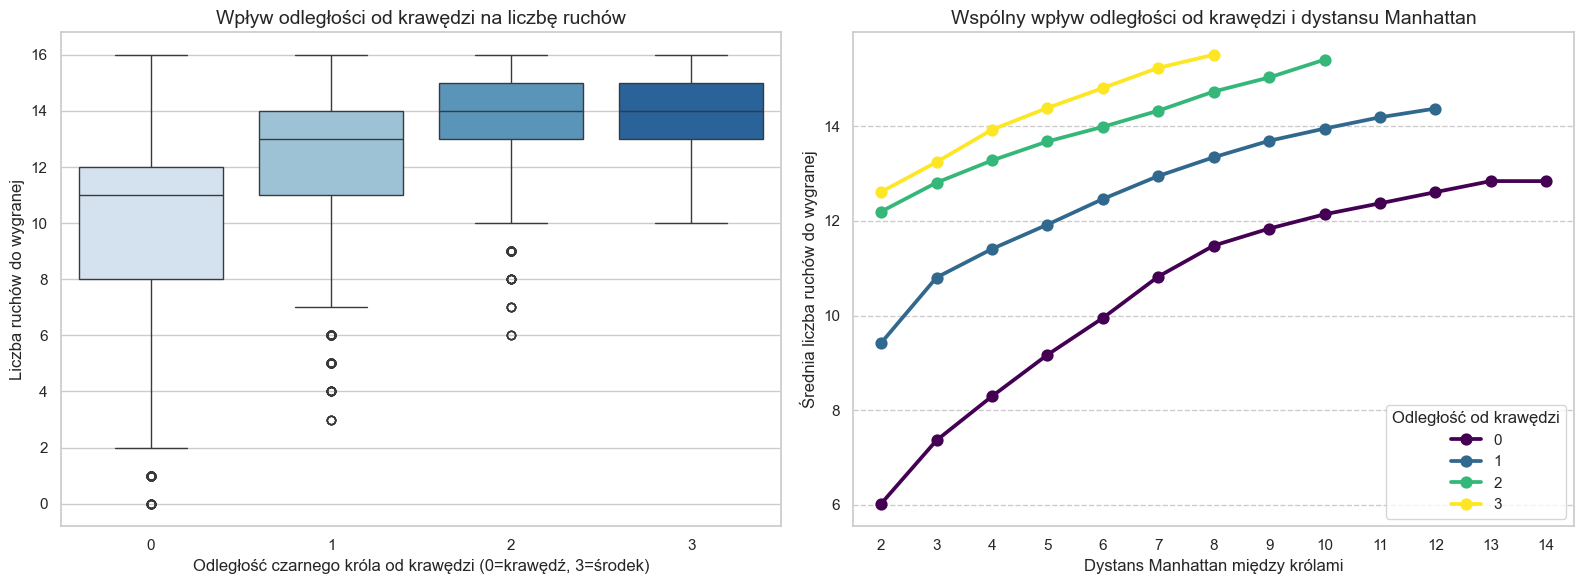

In [15]:

corr_edge = df_no_draws['bk_dist_edge'].corr(df_no_draws['white-depth-of-win'])
print(f"Korelacja - Dystans do krawędzi: {corr_edge:.3f}")


fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.boxplot(
    data=df_no_draws, 
    x='bk_dist_edge', 
    y='white-depth-of-win', 
    ax=axes[0], 
    palette='Blues'
)
axes[0].set_title('Wpływ odległości od krawędzi na liczbę ruchów', fontsize=14)
axes[0].set_xlabel('Odległość czarnego króla od krawędzi (0=krawędź, 3=środek)', fontsize=12)
axes[0].set_ylabel('Liczba ruchów do wygranej', fontsize=12)

sns.pointplot(
    data=df_no_draws, 
    x='dist_manhattan', 
    y='white-depth-of-win', 
    hue='bk_dist_edge',
    palette='viridis',
    errorbar=None, 
    ax=axes[1]
)
axes[1].set_title('Wspólny wpływ odległości od krawędzi i dystansu Manhattan', fontsize=14)
axes[1].set_xlabel('Dystans Manhattan między królami', fontsize=12)
axes[1].set_ylabel('Średnia liczba ruchów do wygranej', fontsize=12)
axes[1].legend(title='Odległość od krawędzi', loc='lower right')
axes[1].grid(True, axis='y', linestyle='--')

plt.tight_layout()
plt.show()

### Odpowiedź do Pytania 3:
Przydatność odległości od krawędzi: Informacja ta jest bardzo przydatna. Osiągnięta korelacja na poziomie 0.508 wskazuje na istotną zależność. Na lewym wykresie wyraźnie widać trend: im czarny król znajduje się bliżej środka planszy (odległość = 3), tym więcej ruchów potrzeba do mata. Jeśli król jest już zepchnięty na krawędź (odległość = 0), liczba ruchów zauważalnie spada. Zgadza się to z logiką szachową i wnioskami z Pytania 1.

Uzupełnienie o odległość między królami: Połączenie obu informacji (wykres liniowy po prawej) zdecydowanie pomaga w dokładniejszym oszacowaniu. W tej analizie celowo wykorzystano metrykę Manhattan, ponieważ w Pytaniu 2 wykazano, że ma ona najwyższy współczynnik korelacji z liczbą ruchów do wygranej.

Sama odległość od krawędzi mówi nam o pozycji czarnego króla, natomiast dystans Manhattan informuje o tym, ile linii (rzędów i kolumn) dzieli obu króli. Na wykresie doskonale widać, że cechy te się uzupełniają – linie biegną w podobnym kierunku. Trend jest jasny: im dalej są od siebie królowie (wzrost na osi X), tym więcej ruchów potrzeba do mata. Jednocześnie odległość od krawędzi "przesuwa" te linie w pionie. Skrajny przypadek to najwyższe punkty na żółtej linii: najdłuższe rozgrywki (średnio powyżej 14 ruchów) mają miejsce wtedy, gdy czarny król jest bezpieczny na środku planszy (odległość od krawędzi = 3), a biały król jest bardzo daleko (dystans Manhattan = 11-12). Zestawienie tych dwóch zmiennych pozwala precyzyjniej przewidzieć długość partii niż każda z nich z osobna.